Import the data provided in the repository `filtered_data` and `tx_rental_filtered` file from your Terminal. Name the database `database` and the collections `home_values` and `tx_rental`.
e.g.: Import the dataset with
shell ```
 `mongoimport --type csv -d database -c home_values --headerline --drop filtered_data.csv`
 `mongoimport --type csv -d database -c tx_rental --headerline --drop tx_rental_filtered.csv`

In [5]:
from pymongo import MongoClient
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [6]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [7]:
# confirm that our new database was created
print(mongo.list_database_names())

['admin', 'config', 'database', 'local', 'uk_food']


In [8]:
db = mongo['database']

In [9]:
# review the collections in our new database
print(db.list_collection_names())

['home_values', 'cap_rates', 'tx_rental']


In [10]:
print(db.home_values.find_one())

{'_id': ObjectId('661738b49ba45bd1a0e0d4c0'), 'RegionID': 39051, 'SizeRank': 2, 'RegionName': 'Houston', 'RegionType': 'city', 'StateName': 'TX', 'State': 'TX', 'Metro': 'Houston-The Woodlands-Sugar Land, TX', 'CountyName': 'Harris County', '2020-01-31': 192076.57910228227, '2020-02-29': 192844.4066626177, '2020-03-31': 193549.04952048397, '2020-04-30': 194049.30507861232, '2020-05-31': 194129.75868815524, '2020-06-30': 194176.13352930112, '2020-07-31': 194548.9855371219, '2020-08-31': 195562.80268338285, '2020-09-30': 197090.8581718128, '2020-10-31': 199042.02637420097, '2020-11-30': 201498.500646208, '2020-12-31': 203949.98801545668, '2021-01-31': 206451.7901256249, '2021-02-28': 208898.09955713173, '2021-03-31': 211677.04212194995, '2021-04-30': 214609.6354222313, '2021-05-31': 217927.9657804951, '2021-06-30': 221471.85832825853, '2021-07-31': 224320.48427686736, '2021-08-31': 226018.9996446464, '2021-09-30': 226885.8464903876, '2021-10-31': 228205.19755383872, '2021-11-30': 230383.

In [11]:
collection = db['home_values']
data = list(collection.find()) 
home_values_df = pd.DataFrame(data)

# Drop the MongoDB ID column if present
home_values_df.drop('_id', axis=1, inplace=True)
home_values_df


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2020-01-31,2020-02-29,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
0,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,192076.579102,192844.406663,...,260877.981524,261747.058037,262686.992261,263642.221105,264097.674868,264251.215748,264097.181129,263894.500323,264115.166031,264626.193654
1,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,188593.855521,189721.377282,...,258762.803629,259070.804286,259292.478941,259427.268917,258986.004638,258152.664859,256904.054819,255413.804889,254326.874227,253762.224225
2,38128,9,Dallas,city,TX,TX,"Dallas-Fort Worth-Arlington, TX",Dallas County,216297.844538,218540.208422,...,303289.56986,303987.706238,304796.575109,305905.538587,306650.779522,307224.973021,307227.639955,306828.870363,307012.266298,307990.336118
3,10221,10,Austin,city,TX,TX,"Austin-Round Rock-Georgetown, TX",Travis County,382799.457978,386650.768544,...,554541.44432,553270.624179,552144.143792,551092.695893,549462.32791,546396.907685,542487.978609,538468.134734,535738.661015,533719.132333
4,18172,15,Fort Worth,city,TX,TX,"Dallas-Fort Worth-Arlington, TX",Tarrant County,208783.526584,209978.832275,...,302020.340768,302037.20466,302393.268898,302811.122821,302913.335104,302876.714297,302707.322488,302479.65677,302375.650892,302358.864013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,40403,28683,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,232810.564099,233838.926989,...,246431.243999,247220.857022,245609.99355,247118.810192,248611.791946,249888.16557,250246.850381,251433.517213,253531.027415,253298.823944
1161,49589,28683,Maud,city,TX,TX,"Texarkana, TX-AR",Bowie County,,,...,134107.150692,135208.566723,135387.136592,135037.684114,133759.102381,132015.753002,129643.59213,128140.53607,127514.726467,127746.315716
1162,47606,30116,Scurry,city,TX,TX,"Dallas-Fort Worth-Arlington, TX",Kaufman County,224512.91548,225591.010757,...,324557.695429,324300.791991,323397.648808,322337.7027,321909.698088,322328.413155,323176.311223,323791.841722,324416.855083,325238.923600
1163,28441,30116,Kerens,city,TX,TX,"Corsicana, TX",Navarro County,77887.495225,78655.145476,...,124242.168392,124217.912176,123635.357095,122980.808307,122556.637601,122214.748212,121371.286547,120433.141594,119386.129759,119590.997333


In [12]:
collection = db['tx_rental']
data = list(collection.find()) 
tx_rental_df = pd.DataFrame(data)

# Drop the MongoDB ID column if present
tx_rental_df.drop('_id', axis=1, inplace=True)
tx_rental_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2020-01-31,2020-02-29,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
0,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1319.159758,1325.291645,...,1546.763799,1546.57139,1547.972385,1547.961589,1551.020013,1555.491168,1561.18254,1567.743572,1570.567848,1572.250076
1,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,1151.148727,1154.890101,...,1404.74928,1401.508611,1397.089617,1397.031326,1396.316124,1398.199217,1398.066707,1397.466639,1394.041111,1392.620914
2,38128,9,Dallas,city,TX,TX,"Dallas-Fort Worth-Arlington, TX",Dallas County,1360.713573,1361.234266,...,1705.581198,1694.916395,1689.45014,1689.258107,1692.513942,1701.121975,1704.075402,1708.206896,1708.551038,1709.807306
3,10221,10,Austin,city,TX,TX,"Austin-Round Rock-Georgetown, TX",Travis County,1414.446645,1419.241049,...,1759.814202,1744.43509,1734.160451,1726.330833,1721.566892,1722.491439,1725.281147,1726.529973,1724.319689,1719.293768
4,18172,15,Fort Worth,city,TX,TX,"Dallas-Fort Worth-Arlington, TX",Tarrant County,1317.022917,1327.468846,...,1674.274401,1672.435786,1671.190123,1670.081755,1672.852082,1678.668352,1681.947801,1682.146701,1679.387643,1677.156930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,18809,11224,Kemah,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Galveston County,,,...,1431.345289,1406.709097,1368.92724,1373.112871,1375.239176,1355.796887,1380.298861,1371.807133,1437.588923,1441.222222
232,47768,26546,South Padre Island,city,TX,TX,"Brownsville-Harlingen, TX",Cameron County,,,...,,,,,,,,,,2350.000000
233,20303,11740,Saint Hedwig,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,,,...,,,,,,,1858.74583,,1879.228157,1911.000000
234,47663,12330,Shenandoah,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Montgomery County,,,...,,,1527.650407,1556.487909,1624.968413,,1788.678409,1860.282622,1894.209917,2005.555556


In [13]:
# Find the most recent month for each city in tx_rental_df
tx_rental_recent = tx_rental_df[['RegionName', tx_rental_df.columns[-1]]]  # Selecting the last column (most recent month)
tx_rental_recent = tx_rental_recent.rename(columns={tx_rental_df.columns[-1]: 'Recent_Month_tx_rental'})

# Find the most recent month for each city in home_values_df
home_values_recent = home_values_df[['RegionName', home_values_df.columns[-1]]]  # Selecting the last column (most recent month)
home_values_recent = home_values_recent.rename(columns={home_values_df.columns[-1]: 'Recent_Month_home_values'})

# Merge the two DataFrames based on the city column
merged_df = pd.merge(tx_rental_recent, home_values_recent, on='RegionName', how='inner')

# Display the merged DataFrame
print(merged_df)

             RegionName  Recent_Month_tx_rental  Recent_Month_home_values
0               Houston             1572.250076             264626.193654
1           San Antonio             1392.620914             253762.224225
2                Dallas             1709.807306             307990.336118
3                Austin             1719.293768             533719.132333
4            Fort Worth             1677.156930             302358.864013
..                  ...                     ...                       ...
228               Kemah             1441.222222             319180.006928
229  South Padre Island             2350.000000             443895.823706
230        Saint Hedwig             1911.000000             289389.180552
231          Shenandoah             2005.555556             416391.096093
232       Sunset Valley             1619.250000             999838.145799

[233 rows x 3 columns]


In [14]:
merged_df['cap_rate'] = (merged_df['Recent_Month_tx_rental'] * 12) / merged_df['Recent_Month_home_values']
print(merged_df)

             RegionName  Recent_Month_tx_rental  Recent_Month_home_values  \
0               Houston             1572.250076             264626.193654   
1           San Antonio             1392.620914             253762.224225   
2                Dallas             1709.807306             307990.336118   
3                Austin             1719.293768             533719.132333   
4            Fort Worth             1677.156930             302358.864013   
..                  ...                     ...                       ...   
228               Kemah             1441.222222             319180.006928   
229  South Padre Island             2350.000000             443895.823706   
230        Saint Hedwig             1911.000000             289389.180552   
231          Shenandoah             2005.555556             416391.096093   
232       Sunset Valley             1619.250000             999838.145799   

     cap_rate  
0    0.071297  
1    0.065855  
2    0.066618  
3    0.0386

In [15]:
merged_df['cap_rate'] = merged_df['cap_rate'] * 100


In [16]:
print(merged_df)

             RegionName  Recent_Month_tx_rental  Recent_Month_home_values  \
0               Houston             1572.250076             264626.193654   
1           San Antonio             1392.620914             253762.224225   
2                Dallas             1709.807306             307990.336118   
3                Austin             1719.293768             533719.132333   
4            Fort Worth             1677.156930             302358.864013   
..                  ...                     ...                       ...   
228               Kemah             1441.222222             319180.006928   
229  South Padre Island             2350.000000             443895.823706   
230        Saint Hedwig             1911.000000             289389.180552   
231          Shenandoah             2005.555556             416391.096093   
232       Sunset Valley             1619.250000             999838.145799   

     cap_rate  
0    7.129680  
1    6.585476  
2    6.661796  
3    3.8656

In [17]:
# Load the uscities.csv file into a DataFrame
uscities_df = pd.read_csv('uscities.csv')

# Filter uscities_df to only include cities in Texas (state_id = 'TX')
uscities_df = uscities_df[uscities_df['state_id'] == 'TX']

# Rename the columns in uscities_df
uscities_df = uscities_df.rename(columns={'lat': 'latitude', 'lng': 'longitude'})

# Iterate through uscities_df and drop records that do not match any RegionName values in merged_df
for index, row in uscities_df.iterrows():
    city_name = row['city']
    if city_name not in merged_df['RegionName'].values:
        uscities_df = uscities_df.drop(index)

# Merge the DataFrames
merged_df = pd.merge(merged_df, uscities_df[['city', 'latitude', 'longitude']], how='inner', left_on='RegionName', right_on='city')

# Drop the duplicate 'city' column if needed
merged_df = merged_df.drop('city', axis=1)

# Display the updated DataFrame
print(merged_df)


             RegionName  Recent_Month_tx_rental  Recent_Month_home_values  \
0               Houston             1572.250076             264626.193654   
1           San Antonio             1392.620914             253762.224225   
2                Dallas             1709.807306             307990.336118   
3                Austin             1719.293768             533719.132333   
4            Fort Worth             1677.156930             302358.864013   
..                  ...                     ...                       ...   
221           Windcrest             1105.833333             318091.645065   
222               Kemah             1441.222222             319180.006928   
223  South Padre Island             2350.000000             443895.823706   
224          Shenandoah             2005.555556             416391.096093   
225       Sunset Valley             1619.250000             999838.145799   

     cap_rate  latitude  longitude  
0    7.129680   29.7860   -95.3885  
1

In [18]:
# # Drop one set of latitude and longitude columns
# merged_df = merged_df.drop(['latitude_x', 'longitude_x'], axis=1)

# # Rename the remaining latitude and longitude columns
# merged_df = merged_df.rename(columns={'latitude_y': 'latitude', 'longitude_y': 'longitude'})

# # Display the updated DataFrame
# print(merged_df.head())

In [19]:
top_10_rental_cities = merged_df.nlargest(10, 'Recent_Month_tx_rental')['RegionName']
print("Top 10 cities by Recent_Month_tx_rental:")
print(top_10_rental_cities)

Top 10 cities by Recent_Month_tx_rental:
141       University Park
209           Trophy Club
182               Lakeway
128             Southlake
217           Iowa Colony
216                 Lavon
166       Timberwood Park
181               Red Oak
187         Glenn Heights
223    South Padre Island
Name: RegionName, dtype: object


In [20]:
top_10_home_values_cities = merged_df.nlargest(10, 'Recent_Month_home_values')['RegionName']
print("\nTop 10 cities by Recent_Month_home_values:")
print(top_10_home_values_cities)


Top 10 cities by Recent_Month_home_values:
141     University Park
128           Southlake
172            Bellaire
225       Sunset Valley
204            Bee Cave
122             Prosper
182             Lakeway
160    Dripping Springs
213       Alamo Heights
209         Trophy Club
Name: RegionName, dtype: object


In [21]:
top_10_cap_rate_cities = merged_df.nlargest(10, 'cap_rate')['RegionName']
print("\nTop 10 cities by cap_rate:")
print(top_10_cap_rate_cities)


Top 10 cities by cap_rate:
74          Port Arthur
32             Beaumont
169              Groves
153           Corsicana
173    White Settlement
198           Hitchcock
175           La Marque
117              Orange
123          Big Spring
217         Iowa Colony
Name: RegionName, dtype: object


In [22]:
# Get the top 10 cities by Recent_Month_home_values
top_10_home_values_cities = merged_df.nlargest(10, 'Recent_Month_home_values')['RegionName']

# Filter the DataFrame for the top 10 cities and select the RegionName and cap_rate columns
top_10_cap_rate_df = merged_df.loc[merged_df['RegionName'].isin(top_10_home_values_cities), ['RegionName', 'cap_rate']]

print(top_10_cap_rate_df)

           RegionName  cap_rate
122           Prosper  2.592880
128         Southlake  2.711911
141   University Park  2.222430
160  Dripping Springs  3.434662
172          Bellaire  2.632616
182           Lakeway  4.469184
204          Bee Cave  2.690283
209       Trophy Club  5.311621
213     Alamo Heights  2.814823
225     Sunset Valley  1.943415


In [23]:
records = merged_df.to_dict(orient='records')
# Specify the database name, or create it if it doesn't exist
db = mongo['database']
# Specify the collection name. This creates a new collection if it doesn't already exist

collection = db['cap_rates']

collection.drop()

# Insert the records into the collection
collection.insert_many(records)

InsertManyResult([ObjectId('66189d8abd5e834cb3209c98'), ObjectId('66189d8abd5e834cb3209c99'), ObjectId('66189d8abd5e834cb3209c9a'), ObjectId('66189d8abd5e834cb3209c9b'), ObjectId('66189d8abd5e834cb3209c9c'), ObjectId('66189d8abd5e834cb3209c9d'), ObjectId('66189d8abd5e834cb3209c9e'), ObjectId('66189d8abd5e834cb3209c9f'), ObjectId('66189d8abd5e834cb3209ca0'), ObjectId('66189d8abd5e834cb3209ca1'), ObjectId('66189d8abd5e834cb3209ca2'), ObjectId('66189d8abd5e834cb3209ca3'), ObjectId('66189d8abd5e834cb3209ca4'), ObjectId('66189d8abd5e834cb3209ca5'), ObjectId('66189d8abd5e834cb3209ca6'), ObjectId('66189d8abd5e834cb3209ca7'), ObjectId('66189d8abd5e834cb3209ca8'), ObjectId('66189d8abd5e834cb3209ca9'), ObjectId('66189d8abd5e834cb3209caa'), ObjectId('66189d8abd5e834cb3209cab'), ObjectId('66189d8abd5e834cb3209cac'), ObjectId('66189d8abd5e834cb3209cad'), ObjectId('66189d8abd5e834cb3209cae'), ObjectId('66189d8abd5e834cb3209caf'), ObjectId('66189d8abd5e834cb3209cb0'), ObjectId('66189d8abd5e834cb3209c

In [24]:
cap_rates_collection = db["cap_rates"]

# Find all documents in the cap_rates collection
cursor = cap_rates_collection.find()

for document in cursor:
    print(document)


{'_id': ObjectId('66189d8abd5e834cb3209c98'), 'RegionName': 'Houston', 'Recent_Month_tx_rental': 1572.2500761629317, 'Recent_Month_home_values': 264626.193653876, 'cap_rate': 7.12968004166387, 'latitude': 29.786, 'longitude': -95.3885}
{'_id': ObjectId('66189d8abd5e834cb3209c99'), 'RegionName': 'San Antonio', 'Recent_Month_tx_rental': 1392.6209143469002, 'Recent_Month_home_values': 253762.22422453552, 'cap_rate': 6.5854762359649195, 'latitude': 29.4632, 'longitude': -98.5238}
{'_id': ObjectId('66189d8abd5e834cb3209c9a'), 'RegionName': 'Dallas', 'Recent_Month_tx_rental': 1709.8073064244652, 'Recent_Month_home_values': 307990.3361180607, 'cap_rate': 6.661795930255623, 'latitude': 32.7935, 'longitude': -96.7667}
{'_id': ObjectId('66189d8abd5e834cb3209c9b'), 'RegionName': 'Austin', 'Recent_Month_tx_rental': 1719.2937680843927, 'Recent_Month_home_values': 533719.1323332309, 'cap_rate': 3.86561469640764, 'latitude': 30.3005, 'longitude': -97.7522}
{'_id': ObjectId('66189d8abd5e834cb3209c9c')

In [25]:
collection = db['cap_rates']
data = list(collection.find()) 
cap_rates_df = pd.DataFrame(data)

# Drop the MongoDB ID column if present
cap_rates_df.drop('_id', axis=1, inplace=True)
cap_rates_df

,RegionName,Recent_Month_tx_rental,Recent_Month_home_values,cap_rate,latitude,longitude
0,Houston,1572.250076,264626.193654,7.129680,29.7860,-95.3885
1,San Antonio,1392.620914,253762.224225,6.585476,29.4632,-98.5238
2,Dallas,1709.807306,307990.336118,6.661796,32.7935,-96.7667
3,Austin,1719.293768,533719.132333,3.865615,30.3005,-97.7522
4,Fort Worth,1677.156930,302358.864013,6.656290,32.7817,-97.3474
...,...,...,...,...,...,...
221,Windcrest,1105.833333,318091.645065,4.171754,29.5150,-98.3818
222,Kemah,1441.222222,319180.006928,5.418468,29.5309,-95.0196
223,South Padre Island,2350.000000,443895.823706,6.352842,26.1218,-97.1703
224,Shenandoah,2005.555556,416391.096093,5.779823,30.1840,-95.4557


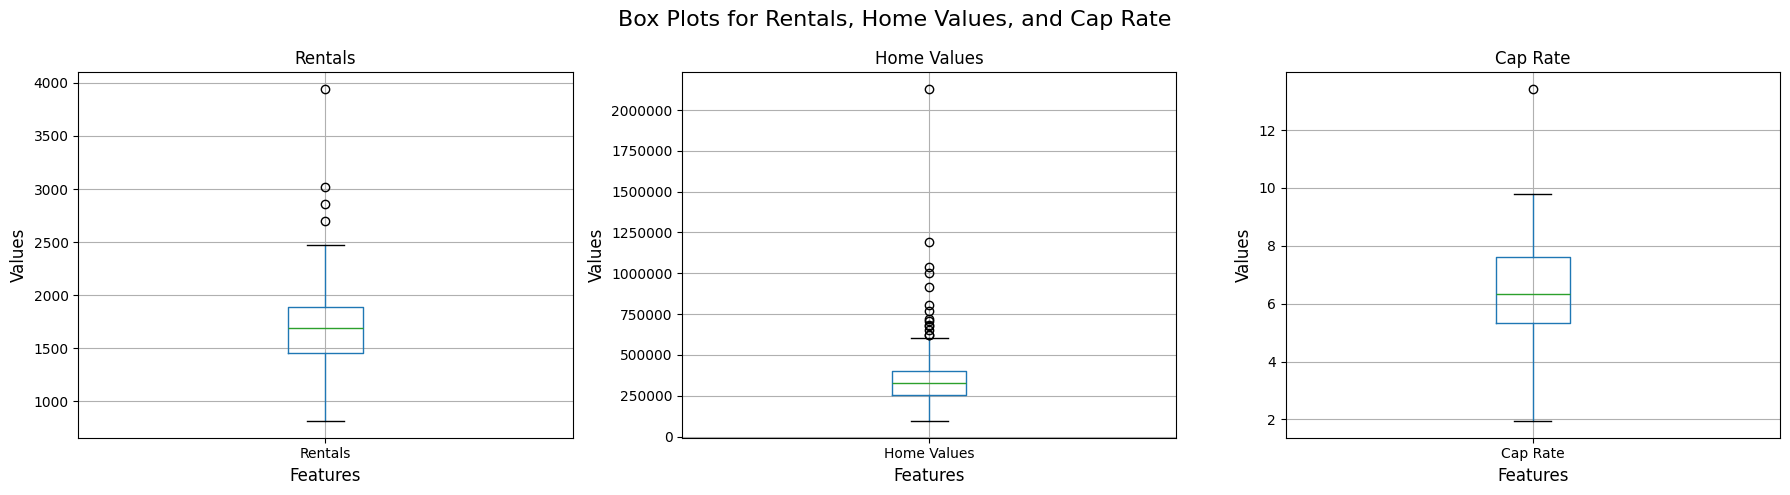

In [26]:
# Renaming the columns for clarity
cap_rates_df = cap_rates_df.rename(columns={"Recent_Month_tx_rental": "Rentals",
                                            "Recent_Month_home_values": "Home Values",
                                            "cap_rate": "Cap Rate"})

# Selecting the renamed columns for box plots
columns_to_plot = ["Rentals", "Home Values", "Cap Rate"]

# Creating a figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(18, 5))

# Creating separate box plots for each feature
for i, column in enumerate(columns_to_plot):
    cap_rates_df[[column]].boxplot(ax=axes[i])
    axes[i].set_title(column)

    # Modifying the y-axis label formatting
    if column != "Cap Rate":
        yticklabels = [f"{val:.0f}" for val in axes[i].get_yticks().tolist()]
        axes[i].yaxis.set_major_locator(mticker.FixedLocator(axes[i].get_yticks()))
        axes[i].yaxis.set_major_formatter(mticker.FixedFormatter(yticklabels))
    else:
        axes[i].yaxis.get_major_formatter().set_scientific(False)

# Adding titles and labels
plt.suptitle('Box Plots for Rentals, Home Values, and Cap Rate', fontsize=16)
for ax in axes:
    ax.set_ylabel('Values', fontsize=12)
    ax.set_xlabel('Features', fontsize=12)

# Displaying the plot
plt.tight_layout() 
plt.show()

In [27]:
# Finding the top 10 highest and lowest values for each feature
top_10_highest_rentals = cap_rates_df.nlargest(10, 'Rentals')
top_10_lowest_rentals = cap_rates_df.nsmallest(10, 'Rentals')

top_10_highest_home_values = cap_rates_df.nlargest(10, 'Home Values')
top_10_lowest_home_values = cap_rates_df.nsmallest(10, 'Home Values')

top_10_highest_cap_rate = cap_rates_df.nlargest(10, 'Cap Rate')
top_10_lowest_cap_rate = cap_rates_df.nsmallest(10, 'Cap Rate')

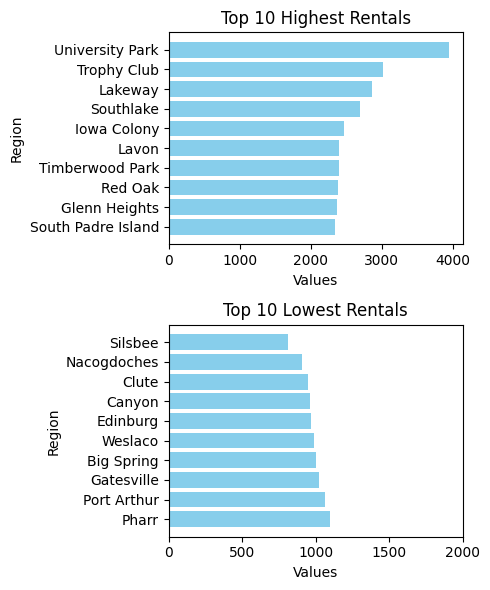

In [28]:
# Create subplots for Rentals
fig, axes = plt.subplots(2, 1, figsize=(5, 6))

# Plotting bar charts for top 10 highest and lowest rentals
top_10_highest_rentals = top_10_highest_rentals.sort_values(by='Rentals', ascending=False)
top_10_lowest_rentals = top_10_lowest_rentals.sort_values(by='Rentals', ascending=True)

ax = axes[0]
ax.barh(top_10_highest_rentals['RegionName'], top_10_highest_rentals['Rentals'], color='skyblue')
ax.set_xlabel('Values')
ax.set_ylabel('Region')
ax.set_title('Top 10 Highest Rentals')
ax.invert_yaxis()
ax.set_xticks([0, 1000, 2000, 3000, 4000])
ax.set_xticklabels(['0', '1000', '2000', '3000', '4000'])

ax = axes[1]
ax.barh(top_10_lowest_rentals['RegionName'], top_10_lowest_rentals['Rentals'], color='skyblue')
ax.set_xlabel('Values')
ax.set_ylabel('Region')
ax.set_title('Top 10 Lowest Rentals')
ax.invert_yaxis()
ax.set_xticks([0, 500, 1000, 1500, 2000])
ax.set_xticklabels(['0', '500', '1000', '1500', '2000'])

plt.tight_layout()
plt.show()

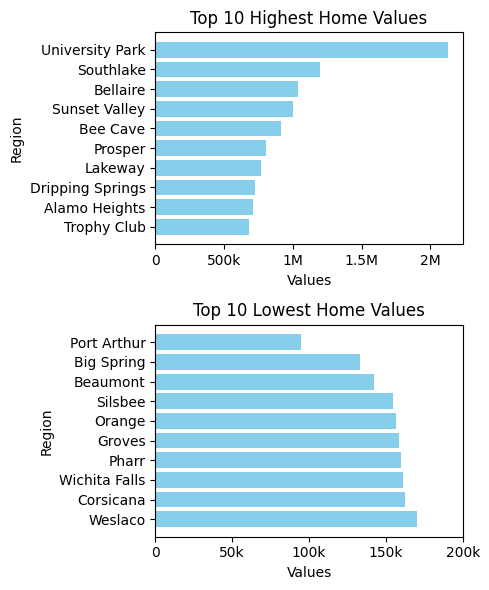

In [29]:
# Create subplots for Home Values
fig, axes = plt.subplots(2, 1, figsize=(5, 6))

# Plotting bar charts for top 10 highest and lowest home values
top_10_highest_home_values = top_10_highest_home_values.sort_values(by='Home Values', ascending=False)
top_10_lowest_home_values = top_10_lowest_home_values.sort_values(by='Home Values', ascending=True)

ax = axes[0]
ax.barh(top_10_highest_home_values['RegionName'], top_10_highest_home_values['Home Values'], color='skyblue')
ax.set_xlabel('Values')
ax.set_ylabel('Region')
ax.set_title('Top 10 Highest Home Values')
ax.invert_yaxis()
ax.set_xticks([0, 500000, 1000000, 1500000, 2000000])
ax.set_xticklabels(['0', '500k', '1M', '1.5M', '2M'])

ax = axes[1]
ax.barh(top_10_lowest_home_values['RegionName'], top_10_lowest_home_values['Home Values'], color='skyblue')
ax.set_xlabel('Values')
ax.set_ylabel('Region')
ax.set_title('Top 10 Lowest Home Values')
ax.invert_yaxis()
ax.set_xticks([0, 50000, 100000, 150000, 200000])
ax.set_xticklabels(['0', '50k', '100k', '150k', '200k'])

plt.tight_layout()
plt.show()

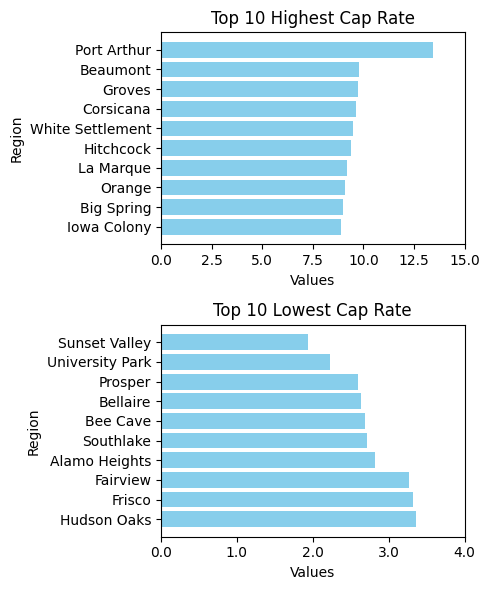

In [30]:
# Create subplots for Cap Rates
fig, axes = plt.subplots(2, 1, figsize=(5, 6))

# Plotting bar charts for top 10 highest and lowest cap rates
top_10_highest_cap_rate = top_10_highest_cap_rate.sort_values(by='Cap Rate', ascending=False)
top_10_lowest_cap_rate = top_10_lowest_cap_rate.sort_values(by='Cap Rate', ascending=True)

ax = axes[0]
ax.barh(top_10_highest_cap_rate['RegionName'], top_10_highest_cap_rate['Cap Rate'], color='skyblue')
ax.set_xlabel('Values')
ax.set_ylabel('Region')
ax.set_title('Top 10 Highest Cap Rate')
ax.invert_yaxis()
ax.set_xticks([0.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0])
ax.set_xticklabels([ '0.0', '2.5', '5.0', '7.5', '10.0', '12.5', '15.0'])

ax = axes[1]
ax.barh(top_10_lowest_cap_rate['RegionName'], top_10_lowest_cap_rate['Cap Rate'], color='skyblue')
ax.set_xlabel('Values')
ax.set_ylabel('Region')
ax.set_title('Top 10 Lowest Cap Rate')
ax.invert_yaxis()
ax.set_xticks([0.0, 1.0, 2.0, 3.0, 4.0])
ax.set_xticklabels([ '0.0', '1.0', '2.0', '3.0', '4.0'])

plt.tight_layout()
plt.show()

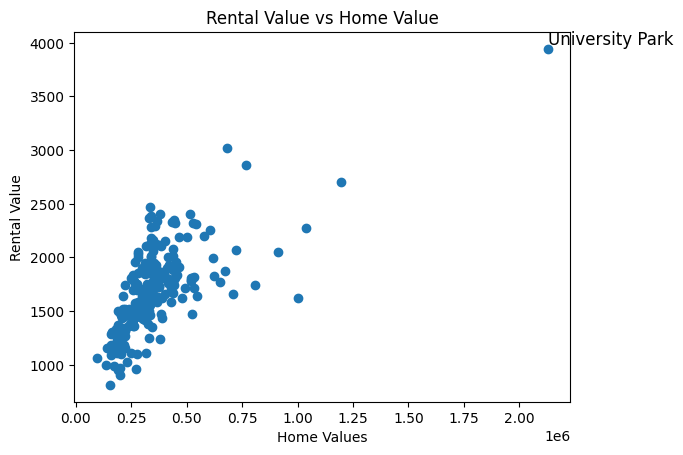

In [31]:
y = merged_df['Recent_Month_tx_rental']  
x = merged_df['Recent_Month_home_values']  


plt.scatter(x, y)
outlier_index = y.idxmax()
plt.text(x[outlier_index], y[outlier_index], f'University Park', fontsize=12, ha='left', va='bottom')


plt.xlabel('Home Values')
plt.ylabel('Rental Value')
plt.title('Rental Value vs Home Value')
plt.show()